    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [8]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
2.293 & 2.427 & 2.600 & 2.785 & 7.214 & 7.415 & 7.717 & 7.923\\ \hline
90.93 & 95.57 & 95.90 & 94.17 & 70.19 & 70.94 & 72.05 & 72.85
\\ \hline



    Теперь основная часть:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / np.sqrt (len  (x)) * np.sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * np.sqrt (mid_x_pow2 - mid_x ** 2)
    
    return MNK_info (k, b, sigma_k, sigma_b)

Данные

In [19]:
U_a = list (map (float, input ("U_a: ").split()))
U_c = list (map (float, input ("U_c: ").split()))

I_a = [U_a_i / 1e5 for U_a_i in U_a]

Графики

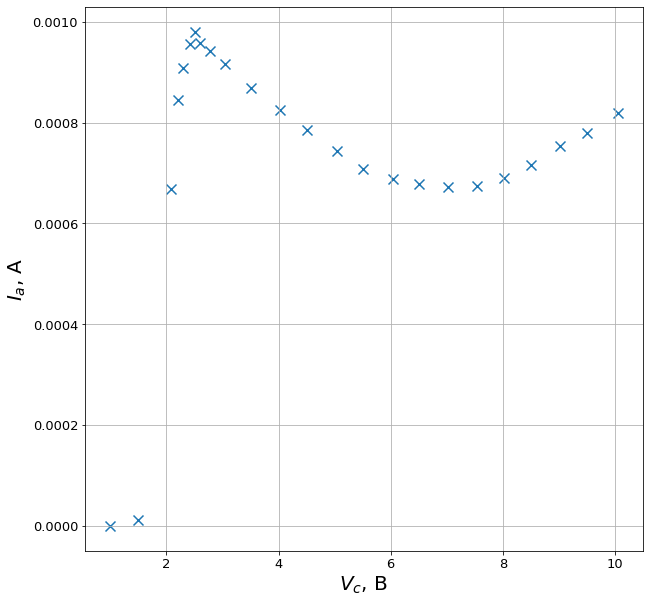

In [13]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (U_c, I_a, marker = 'x', s=100)
# ax.plot (U_c, I_a)

ax.set_xlabel ('$V_c$, В', fontsize = 20)
ax.set_ylabel ('$I_a$, А', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/graph2.pdf")

/tmp/ipykernel_35841/3154426082.py:1: RuntimeWarning: divide by zero encountered in log
  w = - np.log (np.array(I_a) / np.array (U_c))


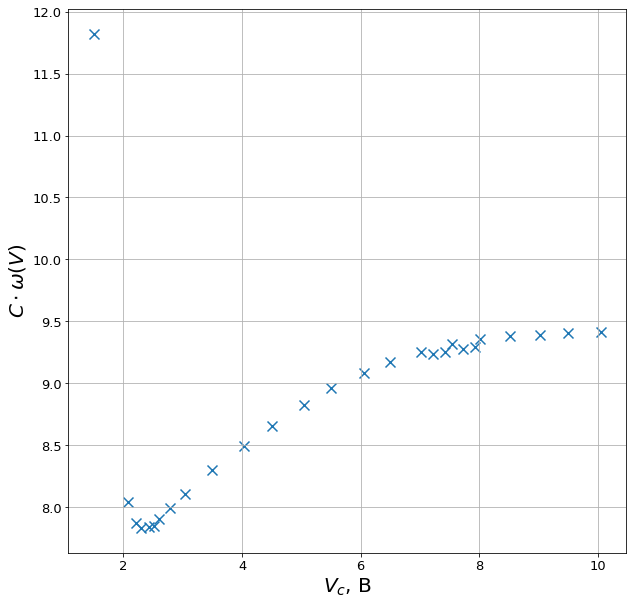

In [20]:
w = - np.log (np.array(I_a) / np.array (U_c)) 

plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (U_c, w, marker = 'x', s=100)
# ax.plot (U_c, I_a)

ax.set_xlabel ('$V_c$, В', fontsize = 20)
ax.set_ylabel ('$C \cdot \omega(V)$', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/graph4.pdf")